**Unemployment analysis with python**

In [61]:
# importing required library
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import datetime as dt
import calendar

In [62]:
# importing the given dataset
ds=pd.read_csv('/content/Unemployment in India.csv')
ds=pd.read_csv('/content/Unemployment_Rate_upto_11_2020.csv')

In [63]:
# updating column names
ds.columns=["state","date","frequency","estimated unemployment rate","estimated employed","estimated labour participation rate","region", "longitude", "latitude"]

In [64]:
# seeing head or top values or table
ds.head()

,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [65]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   state                                267 non-null    object 
 1   date                                 267 non-null    object 
 2   frequency                            267 non-null    object 
 3   estimated unemployment rate          267 non-null    float64
 4   estimated employed                   267 non-null    int64  
 5   estimated labour participation rate  267 non-null    float64
 6   region                               267 non-null    object 
 7   longitude                            267 non-null    float64
 8   latitude                             267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [66]:
round(ds.describe().T)

,count,mean,std,min,25%,50%,75%,max
estimated unemployment rate,267.0,12.0,11.0,0.0,5.0,10.0,17.0,76.0
estimated employed,267.0,13962106.0,13366318.0,117542.0,2838930.0,9732417.0,21878686.0,59433759.0
estimated labour participation rate,267.0,42.0,8.0,17.0,37.0,40.0,44.0,70.0
longitude,267.0,23.0,6.0,11.0,18.0,24.0,27.0,34.0
latitude,267.0,81.0,6.0,71.0,76.0,79.0,85.0,93.0


In [67]:
# Checking for the Null values
ds.isnull().sum()

state                                  0
date                                   0
frequency                              0
estimated unemployment rate            0
estimated employed                     0
estimated labour participation rate    0
region                                 0
longitude                              0
latitude                               0
dtype: int64

In [68]:
# creating a new column for month

ds['date'] = pd.to_datetime(ds['date'], dayfirst=True)
ds['month_int'] =  ds['date'].dt.month
ds['month'] =  ds['month_int'].apply(lambda x: calendar.month_abbr[x])
ds.head()

,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,region,longitude,latitude,month_int,month
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


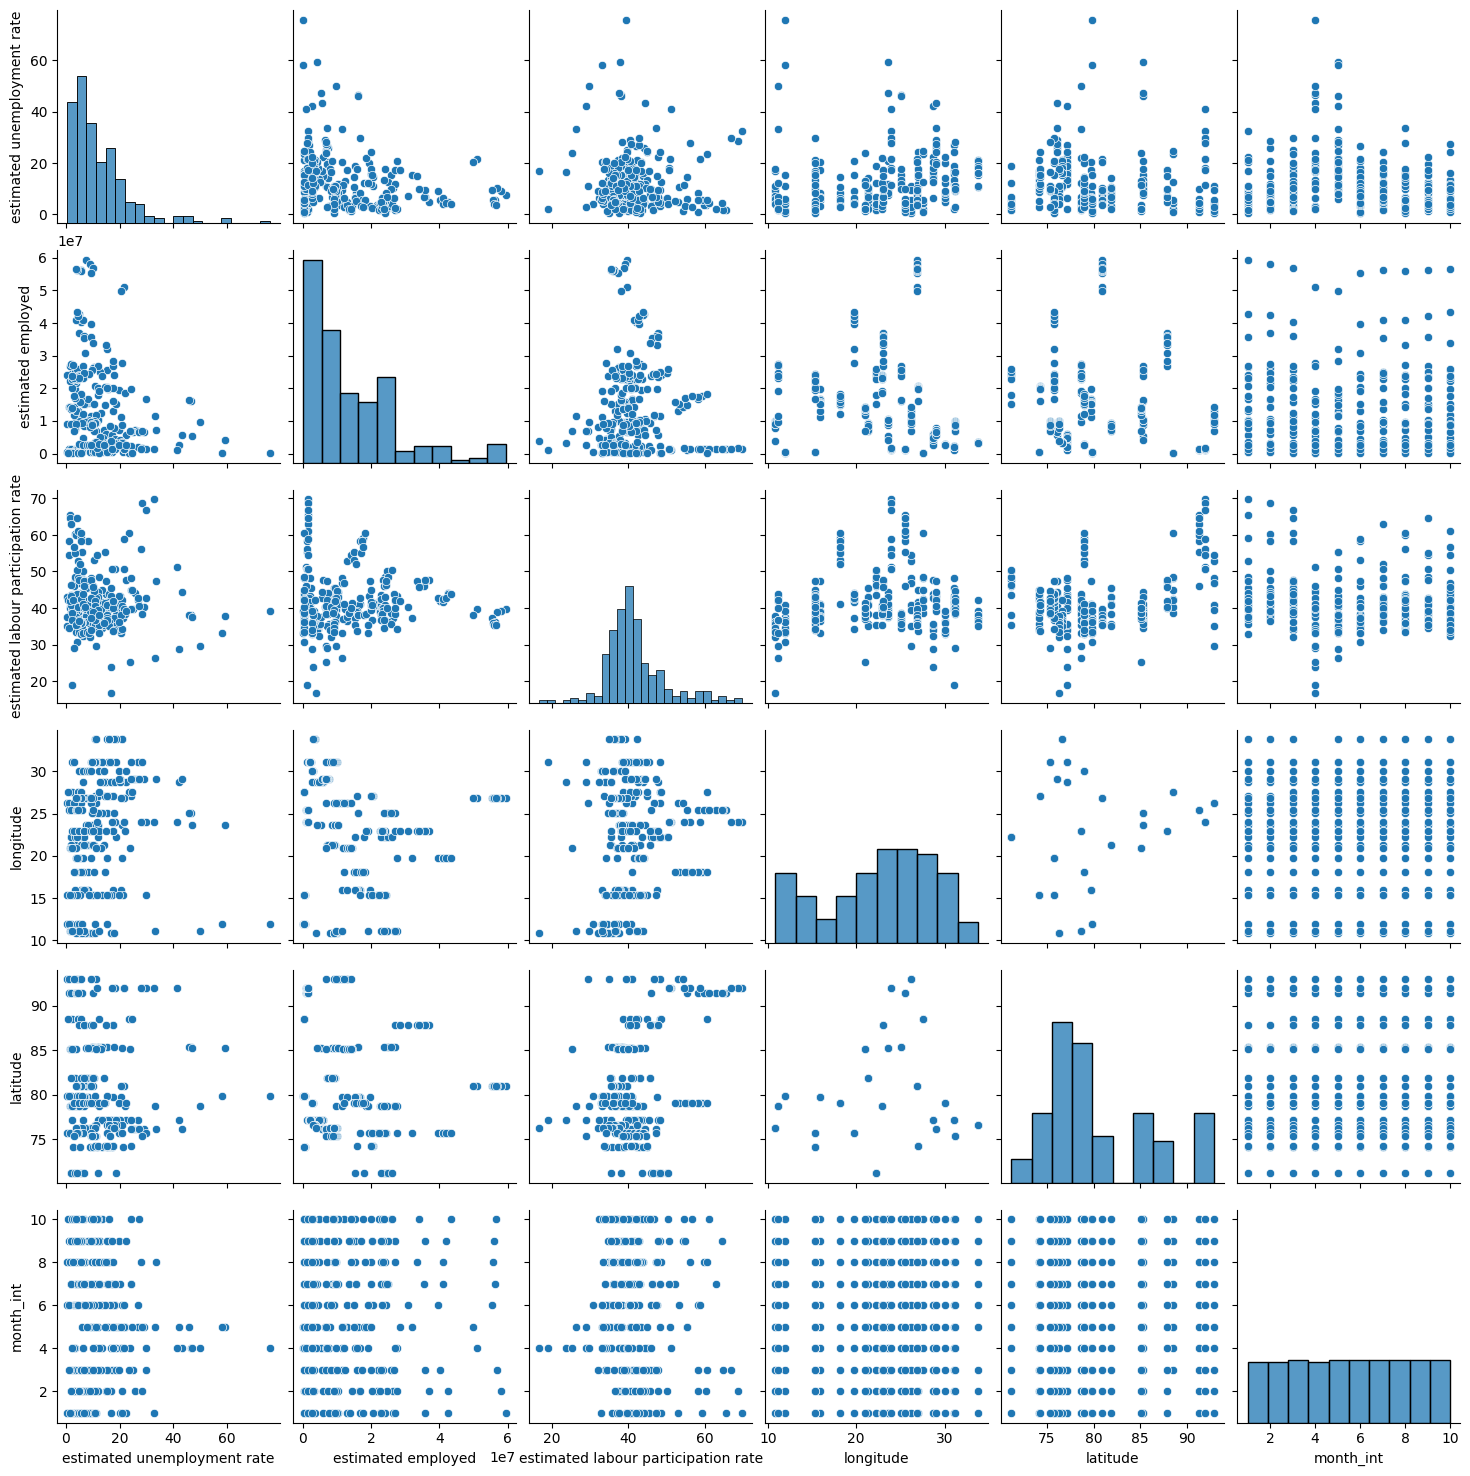

In [20]:
sns.pairplot(ds)


In [21]:
# Numeric data grouped by months

IND =  ds.groupby(["month"])[['estimated unemployment rate', "estimated employed", "estimated labour participation rate"]].mean()
IND = pd.DataFrame(IND).reset_index()

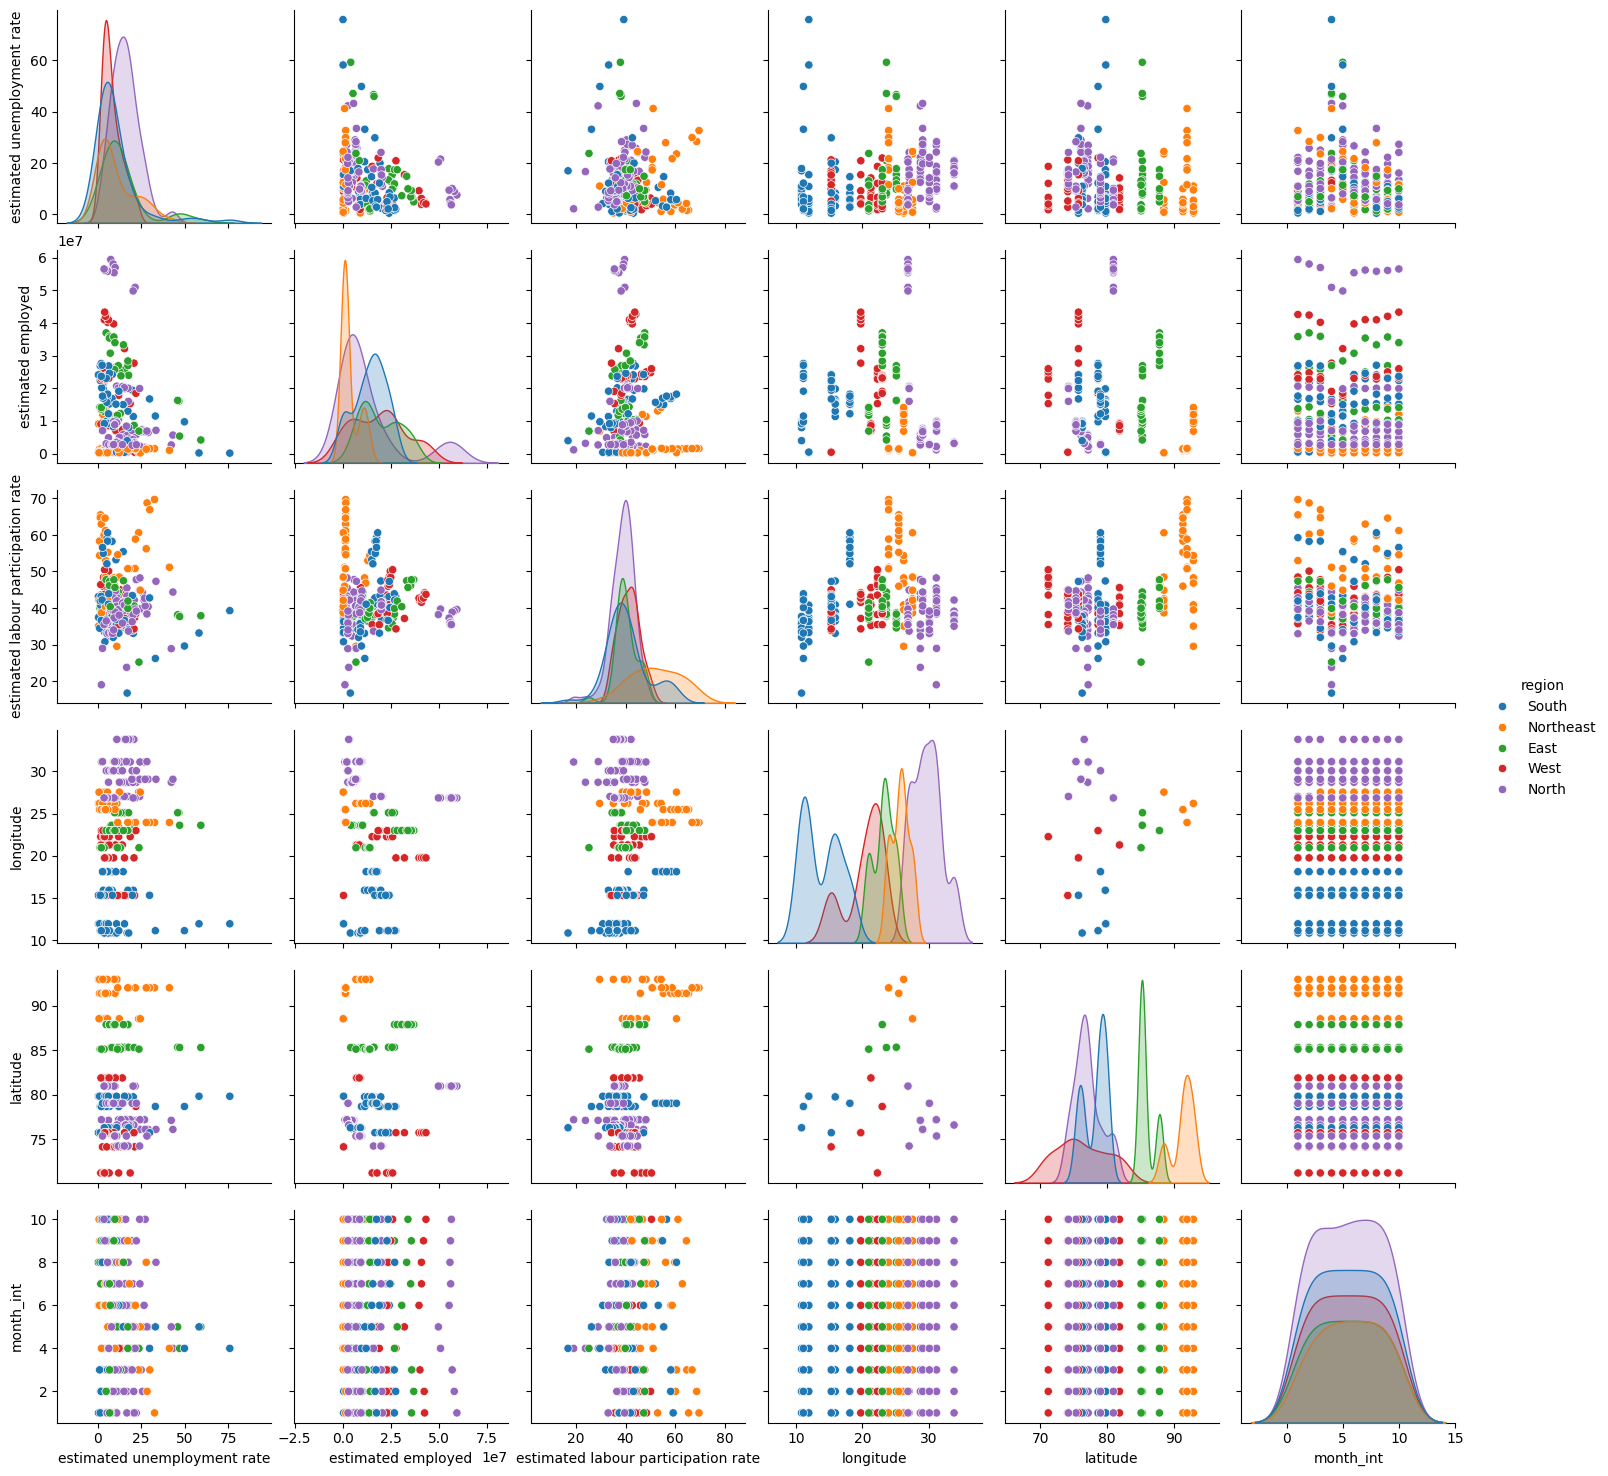

In [22]:
sns.pairplot(data = ds , hue = 'region')


In [37]:
#### Bar plot of estimated employed citizen in every month
fig = px.bar(IND, x='month',y='estimated employed', color='month',
             category_orders = {"month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct"]},
             title='estimated employed people from Jan 2020 to Oct 2020')

fig.show()

In [40]:
# bar plot unemployment rate (monthly)

fig = px.bar(ds, x='state',y='estimated unemployment rate', animation_frame = 'month', color='state',
            title='Unemployment rate from Jan 2020 to Oct 2020 (State)')

fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"]=2000

fig.show()

In [26]:
fig = px.scatter_geo(ds,'longitude', 'latitude', color="state",
                     hover_name="state", size="estimated unemployment rate",
                     animation_frame="month",scope='asia',title='Impack of lockdown on employement in India')

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.update_geos(lataxis_range=[5,40], lonaxis_range=[65, 100],oceancolor="lightblue",
    showocean=True)

fig.show()

In [27]:
ds.region.unique()


array(['South', 'Northeast', 'East', 'West', 'North'], dtype=object)

In [28]:
# scatter plot

fig = px.scatter_matrix(ds, dimensions=['estimated unemployment rate','estimated employed','estimated labour participation rate'], color='region')
fig.show()

In [29]:
unemployment = ds.groupby(['region','state'])['estimated unemployment rate'].mean().reset_index()

unemployment.head()

,region,state,estimated unemployment rate
0,East,Bihar,19.471
1,East,Jharkhand,19.539
2,East,Odisha,6.462
3,East,West Bengal,10.192
4,North,Delhi,18.414


In [48]:
fig = px.sunburst(unemployment, path=['region','state'], values='estimated unemployment rate',
                  title= 'Unemployment rate in every State and Region', height=650)
fig.show()

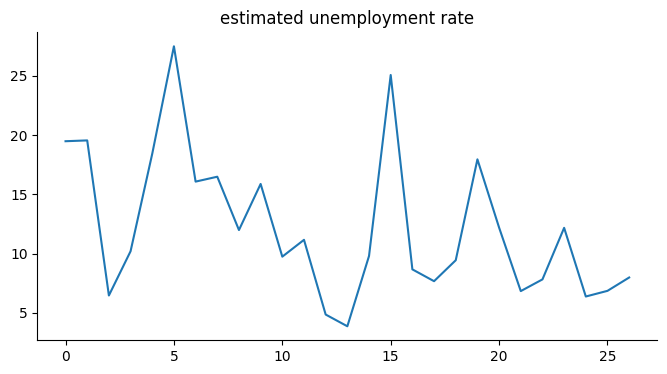

In [55]:
from matplotlib import pyplot as plt
unemployment['estimated unemployment rate'].plot(kind='line', figsize=(8, 4), title='estimated unemployment rate')
plt.gca().spines[['top', 'right']].set_visible(False)